In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

from tabulate import tabulate

In [10]:
df = pd.read_csv("Datasets/babyboom.csv")
df.columns = ["TimeOfBirth", "Sex", "WeightInGrams", "MinutesAfterMidnight"]

conditions = [
    df["Sex"] == 1,
    df["Sex"] == 2,
    pd.Series([True] * len(df)),
]
labels = ["all babies", "males", "females"]

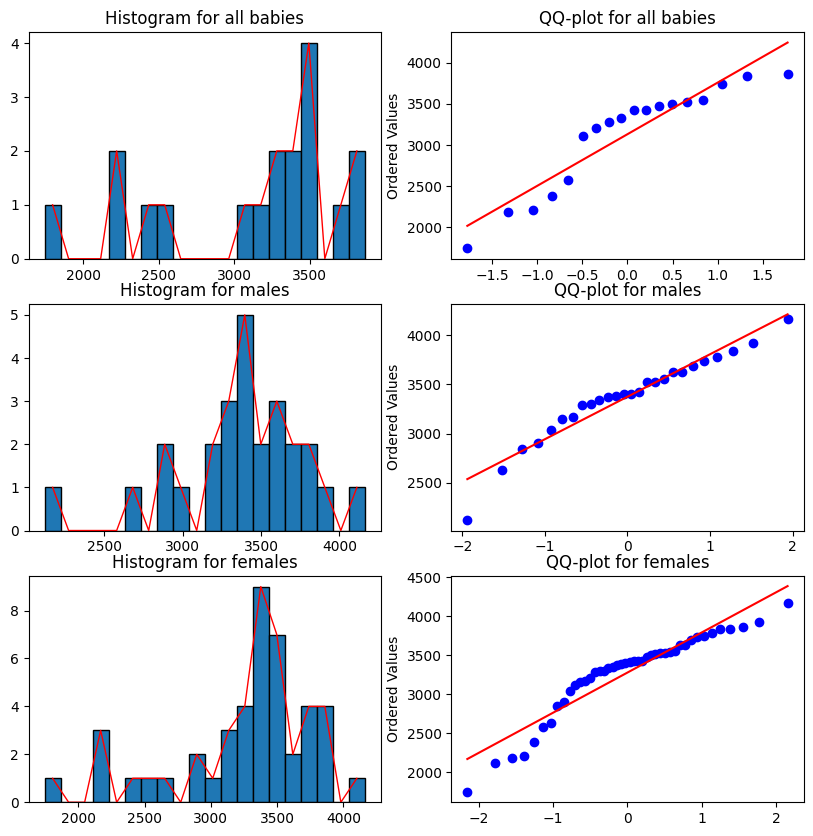

In [11]:
# Graphical verification of assumptions about normality
# For that purpose histograms and qq-plots are built

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

for i in range(3):
    data = df[conditions[i]]["WeightInGrams"]
    # histogram with frequency polygon    
    n, bins, patches = axes[i, 0].hist(data, bins=20, edgecolor="black")
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    axes[i, 0].plot(bin_centers, n, linestyle="-", color="red", linewidth=1)
    axes[i, 0].set_title(f"Histogram for {labels[i]}")
    # qq-plot
    stats.probplot(data, dist="norm", plot=axes[i, 1])
    axes[i, 1].set_title(f"QQ-plot for {labels[i]}")
    axes[i, 1].set_xlabel("")


In [12]:
# Confidence intervals for the parameters of the normal distribution
confidence = 0.95
alpha = 1 - confidence

table = []

for i in range(3):
    line = [labels[i]]

    data = df[conditions[i]]["WeightInGrams"]
    n = len(data)
    std = data.std()
    mean = data.mean()
    
    # confidence interval for mean
    t = stats.t.ppf(1 - alpha/2, df=n-1)
    mean_ci = (
        round((mean - t * std / np.sqrt(n)).item(), 4), 
        round((mean + t * std / np.sqrt(n)).item(), 4),
    )
    line.append(mean_ci)

    # confidence interval for standard deviation
    hi2_lower = stats.chi2.ppf(alpha/2, df=n-1)
    hi2_upper = stats.chi2.ppf(1 - alpha/2, df=n-1)
    std_ci = (
        round(np.sqrt((n-1)*std**2/hi2_upper).item(), 4),
        round(np.sqrt((n-1)*std**2/hi2_lower).item(), 4),
    )
    line.append(std_ci)

    table.append(line)

print(tabulate(table, headers=["", "Mean", "Standard deviation"], tablefmt="fancy_grid"))


╒════════════╤════════════════════════╤══════════════════════╕
│            │ Mean                   │ Standard deviation   │
╞════════════╪════════════════════════╪══════════════════════╡
│ all babies │ (2818.3658, 3446.523)  │ (473.9317, 946.8332) │
├────────────┼────────────────────────┼──────────────────────┤
│ males      │ (3202.4162, 3548.1992) │ (335.6983, 590.8785) │
├────────────┼────────────────────────┼──────────────────────┤
│ females    │ (3115.418, 3436.4911)  │ (436.2725, 669.0306) │
╘════════════╧════════════════════════╧══════════════════════╛


In [13]:
# Testing hypotheses about the normal distribution
confidence = 0.95
alpha = 1 - confidence

table = []

for i in range(3):
    line = [labels[i]]

    data = df[conditions[i]]["WeightInGrams"]
    std_data = (data - data.mean()) / data.std()
    statistic, p_value = stats.kstest(std_data, "norm")
    line.append(statistic)
    line.append(p_value)

    if p_value > alpha:
        line.append("Yes")
    else:
        line.append("No")
    
    table.append(line)

print(tabulate(table, headers=["", "Statistic", "P-value", "Is normally distributed"], tablefmt="fancy_grid"))

╒════════════╤═════════════╤═══════════╤═══════════════════════════╕
│            │   Statistic │   P-value │ Is normally distributed   │
╞════════════╪═════════════╪═══════════╪═══════════════════════════╡
│ all babies │    0.214278 │ 0.331584  │ Yes                       │
├────────────┼─────────────┼───────────┼───────────────────────────┤
│ males      │    0.155443 │ 0.507076  │ Yes                       │
├────────────┼─────────────┼───────────┼───────────────────────────┤
│ females    │    0.183364 │ 0.0910652 │ Yes                       │
╘════════════╧═════════════╧═══════════╧═══════════════════════════╛


╒════════════════════╤═════════════╤═════════════╤════════════════════════════════╕
│                    │   Statistic │     P-value │ Is exponentially distributed   │
╞════════════════════╪═════════════╪═════════════╪════════════════════════════════╡
│ Time between birth │    0.952724 │ 2.04404e-57 │ No                             │
╘════════════════════╧═════════════╧═════════════╧════════════════════════════════╛


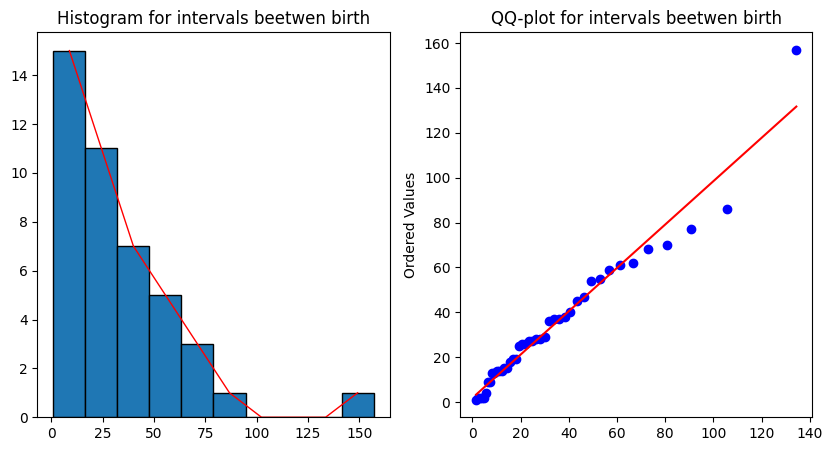

In [14]:
# Exponential distribution test for intervals between birth
data = df["MinutesAfterMidnight"].diff().dropna()
data = data[np.isfinite(data)]
loc, scale = stats.expon.fit(data)


# graphical verification of assumptions about exponential distribution
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# histogram with frequency polygon    
n, bins, patches = axes[0].hist(data, bins=10, edgecolor="black")
bin_centers = 0.5 * (bins[1:] + bins[:-1])
axes[0].plot(bin_centers, n, linestyle="-", color="red", linewidth=1)
axes[0].set_title(f"Histogram for intervals beetwen birth")
# qq-plot
stats.probplot(data, dist="expon", sparams=(loc, scale), plot=axes[1])
axes[1].set_title(f"QQ-plot for intervals beetwen birth")
axes[1].set_xlabel("")


# numerical verification
confidence = 0.95
alpha = 1 - confidence

table = []
line = ["Time between birth"]

std_data = (data - data.mean()) / data.std()
statistic, p_value = stats.kstest(std_data, "expon", args=(loc, scale))
line.append(statistic)
line.append(p_value)
if p_value > alpha:
    line.append("Yes")
else:
    line.append("No")

table.append(line)

print(tabulate(table, headers=["", "Statistic", "P-value", "Is exponentially distributed"], tablefmt="fancy_grid"))

Text(0.5, 1.0, 'Histogram for number of births per hour')

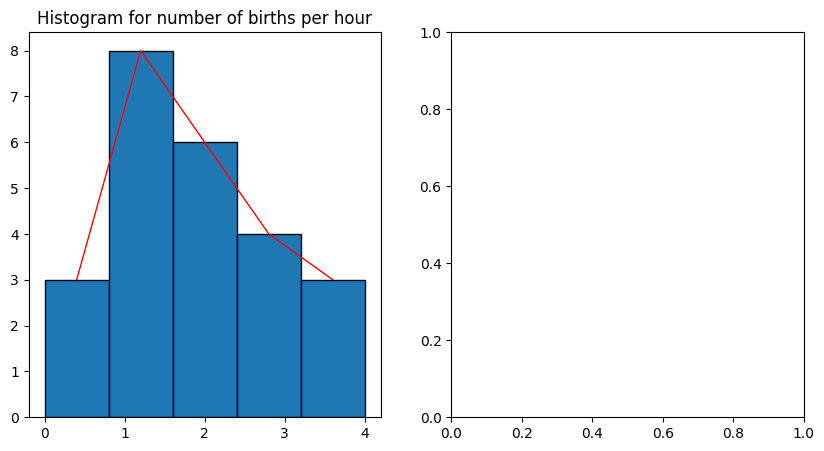

In [15]:
# Puasson distribution test for number of births per hour
dict = {}
for minutes in df["MinutesAfterMidnight"]:
    hour = minutes//60
    if hour not in dict:
        dict[hour] = 0
    dict[hour] += 1

for i in range(24):
    if i not in dict:
        dict[i] = 0
vals = [dict[i] for i in sorted(dict.keys())]
data = pd.DataFrame(vals, columns=["NumberOfBirths"])

# graphical verification of assumptions about exponential distribution
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# histogram with frequency polygon    
n, bins, patches = axes[0].hist(data, bins=5, edgecolor="black")
bin_centers = 0.5 * (bins[1:] + bins[:-1])
axes[0].plot(bin_centers, n, linestyle="-", color="red", linewidth=1)
axes[0].set_title(f"Histogram for number of births per hour")
# qq-plot
# stats.probplot(data, dist="", sparams=(loc, scale), plot=axes[1])
# axes[1].set_title(f"QQ-plot for intervals beetwen birth")
# axes[1].set_xlabel("")
